## Fourier Series

In [537]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $0$ and $1$.

<img width=600px src="SquareFunction.png">

In [538]:
def squareFunction(x):
    return np.mod(x, np.pi*2) > np.pi
    

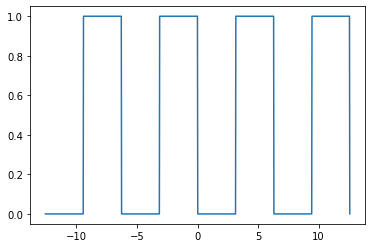

In [539]:
### TO DO: Plot the square function from (-4pi, 4pi)
xx = np.linspace((-4*np.pi), (4*np.pi), 1000)
yy = squareFunction(xx).astype(np.float64)

plt.plot(xx, yy)

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [540]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the dourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    ### TO DO: Create the fourier sine series sum

    sum = 0
    for i in range (k):
        
        sum = sum + bk[i][0] * np.sin(i*x)

    return sum

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [541]:
def integrad(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients
    sf = squareFunction(x).astype(np.int64)
    if (sf == 0):
        sf = -1
    value = sf * np.sin(k*x)
    return value

def integrate(n):
    bk = []
    for i in range (n):
        bk.append(quad(integrad, 0, np.pi, args=i))

    return bk

In [542]:
## TO DO: Calculate the b_k coefficient values
# print(integrate(100))

Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

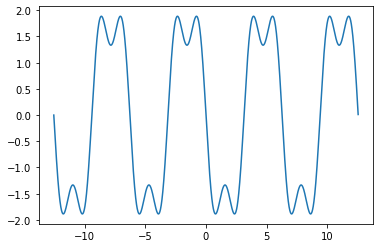

In [543]:
## TO DO: Plot the sum of the first 5 elements. 
xx = np.array(np.arange(-4*np.pi, 4*np.pi, 0.01))
yy = []
bk = integrate(5)
for i in xx:
    yy.append((fourierSineSeries(5, bk, i)))
plt.plot(xx,yy)

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

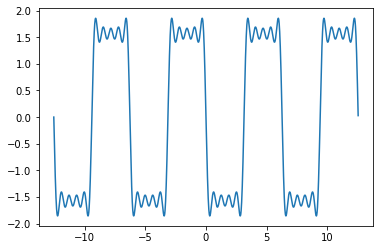

In [544]:
## TO DO: Plot the sum of the first 10coefficient  elements.
xx = np.array(np.arange(-4*np.pi, 4*np.pi, 0.01))
yy = []
bk = integrate(10)
for i in xx:
    yy.append((fourierSineSeries(10, bk, i)))
plt.plot(xx,yy)

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

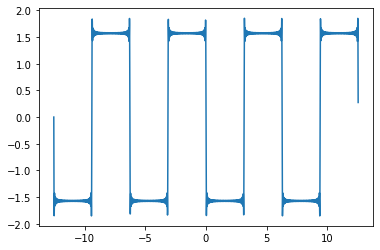

In [545]:
## TO DO: Plot the sum of the first 100 elements.
xx = np.array(np.arange(-4*np.pi, 4*np.pi, 0.01))
yy = []
bk = integrate(100)
for i in xx:
    yy.append((fourierSineSeries(100, bk, i)))
plt.plot(xx,yy)